## Multiple Linear Regression Assignment

## Background

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 




In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [154]:
import warnings
warnings.filterwarnings('ignore')

#### Read Data

In [155]:
bikes_data = pd.read_csv("day.csv")

#### Data understanding

In [156]:
bikes_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [157]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [158]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Interpretation from info() output:
- Overall looks like no Null value present but we will explore more in later section to find missing values
- Also except dteday all other columns are integer or else float.

In [159]:
bikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [160]:
print(bikes_data['instant'].min())
print(bikes_data['instant'].max())

1
730


##### From head and min max values looks like instant is kind of key column (also mentioned in data dictionary) and can be ignored for modeling|

##### seasons data mapping from data dictionary
- 1:spring
- 2:summer
- 3:fall
- 4:winter

In [161]:
# season (1:spring, 2:summer, 3:fall, 4:winter) 
bikes_data['season'] = bikes_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes_data['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

##### yr data mapping from data dictionary
- 0: 2018
- 1:2019

In [162]:
bikes_data['yr'] = bikes_data['yr'].map({0:'2018', 1:'2019'})
bikes_data['yr'].astype('category').value_counts()

2018    365
2019    365
Name: yr, dtype: int64

##### weathersit data mapping from data dictionary
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [163]:
bikes_data['weathersit'] = bikes_data['weathersit'].map({1:'clear', 2:'Mist', 3:'Light_Snow', 4:'Heavy_Rain'}) 
bikes_data['weathersit'].astype('category').value_counts()

clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

- there is not data available from "4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
- and very few data from "3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" which is obvious because these weather conditions are not normal

In [164]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bikes_data['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [165]:
bikes_data['mnth'] = bikes_data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}) 
bikes_data['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [166]:
bikes_data['weekday'] = bikes_data['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}) 
bikes_data['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

### Data Visualization
- Univariate Analysis
- multivariate Analysis

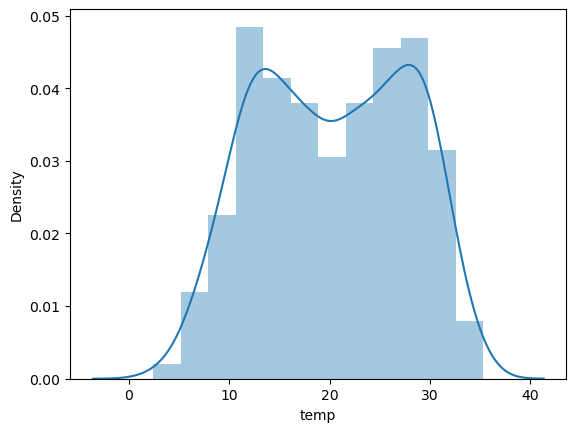

In [16]:
# temperature
sns.distplot(bikes_data['temp'])
plt.show()

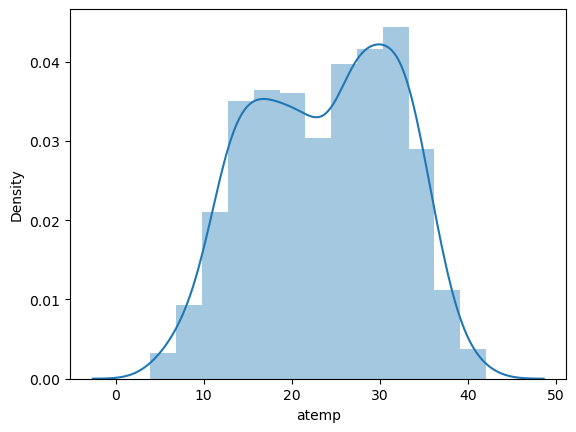

In [17]:
# temperature
sns.distplot(bikes_data['atemp'])
plt.show()

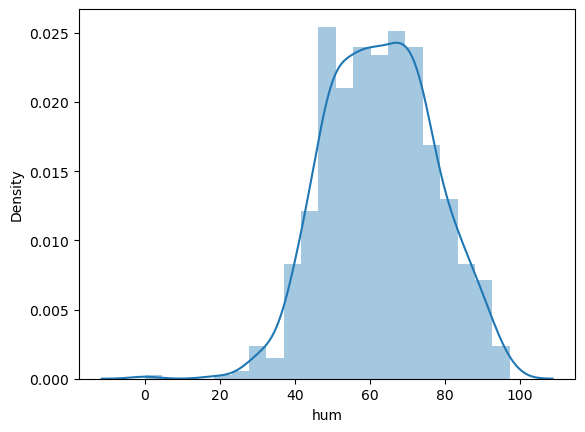

In [18]:
# temperature
sns.distplot(bikes_data['hum'])
plt.show()

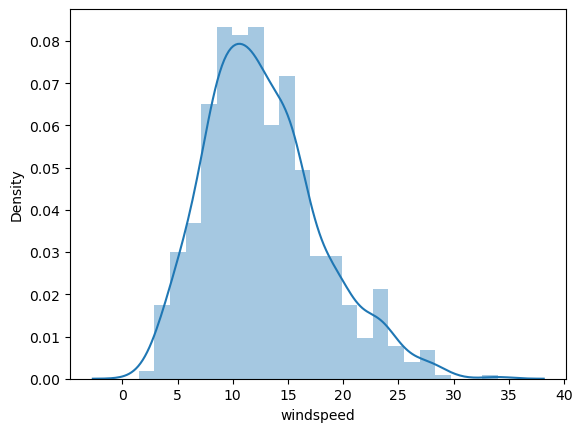

In [19]:
# temperature
sns.distplot(bikes_data['windspeed'])
plt.show()

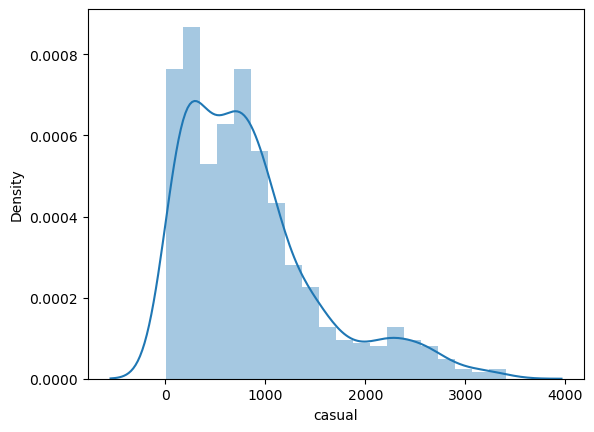

In [20]:
# temperature
sns.distplot(bikes_data['casual'])
plt.show()

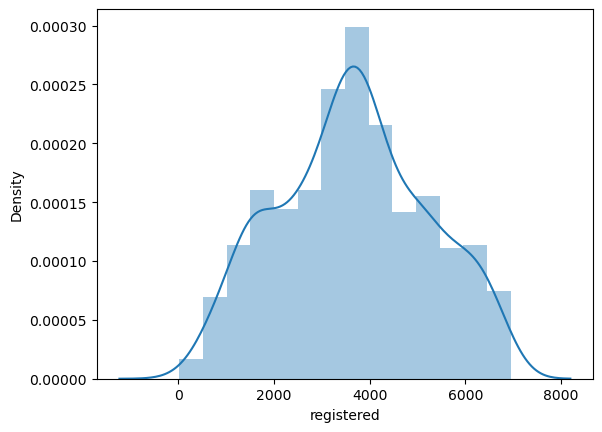

In [21]:
# temperature
sns.distplot(bikes_data['registered'])
plt.show()

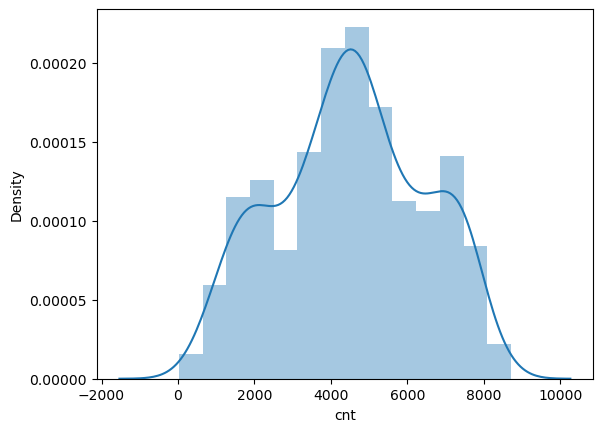

In [22]:
# temperature
sns.distplot(bikes_data['cnt'])
plt.show()

In [167]:
# Converting date to datetime format
bikes_data['dteday']=bikes_data['dteday'].astype('datetime64')

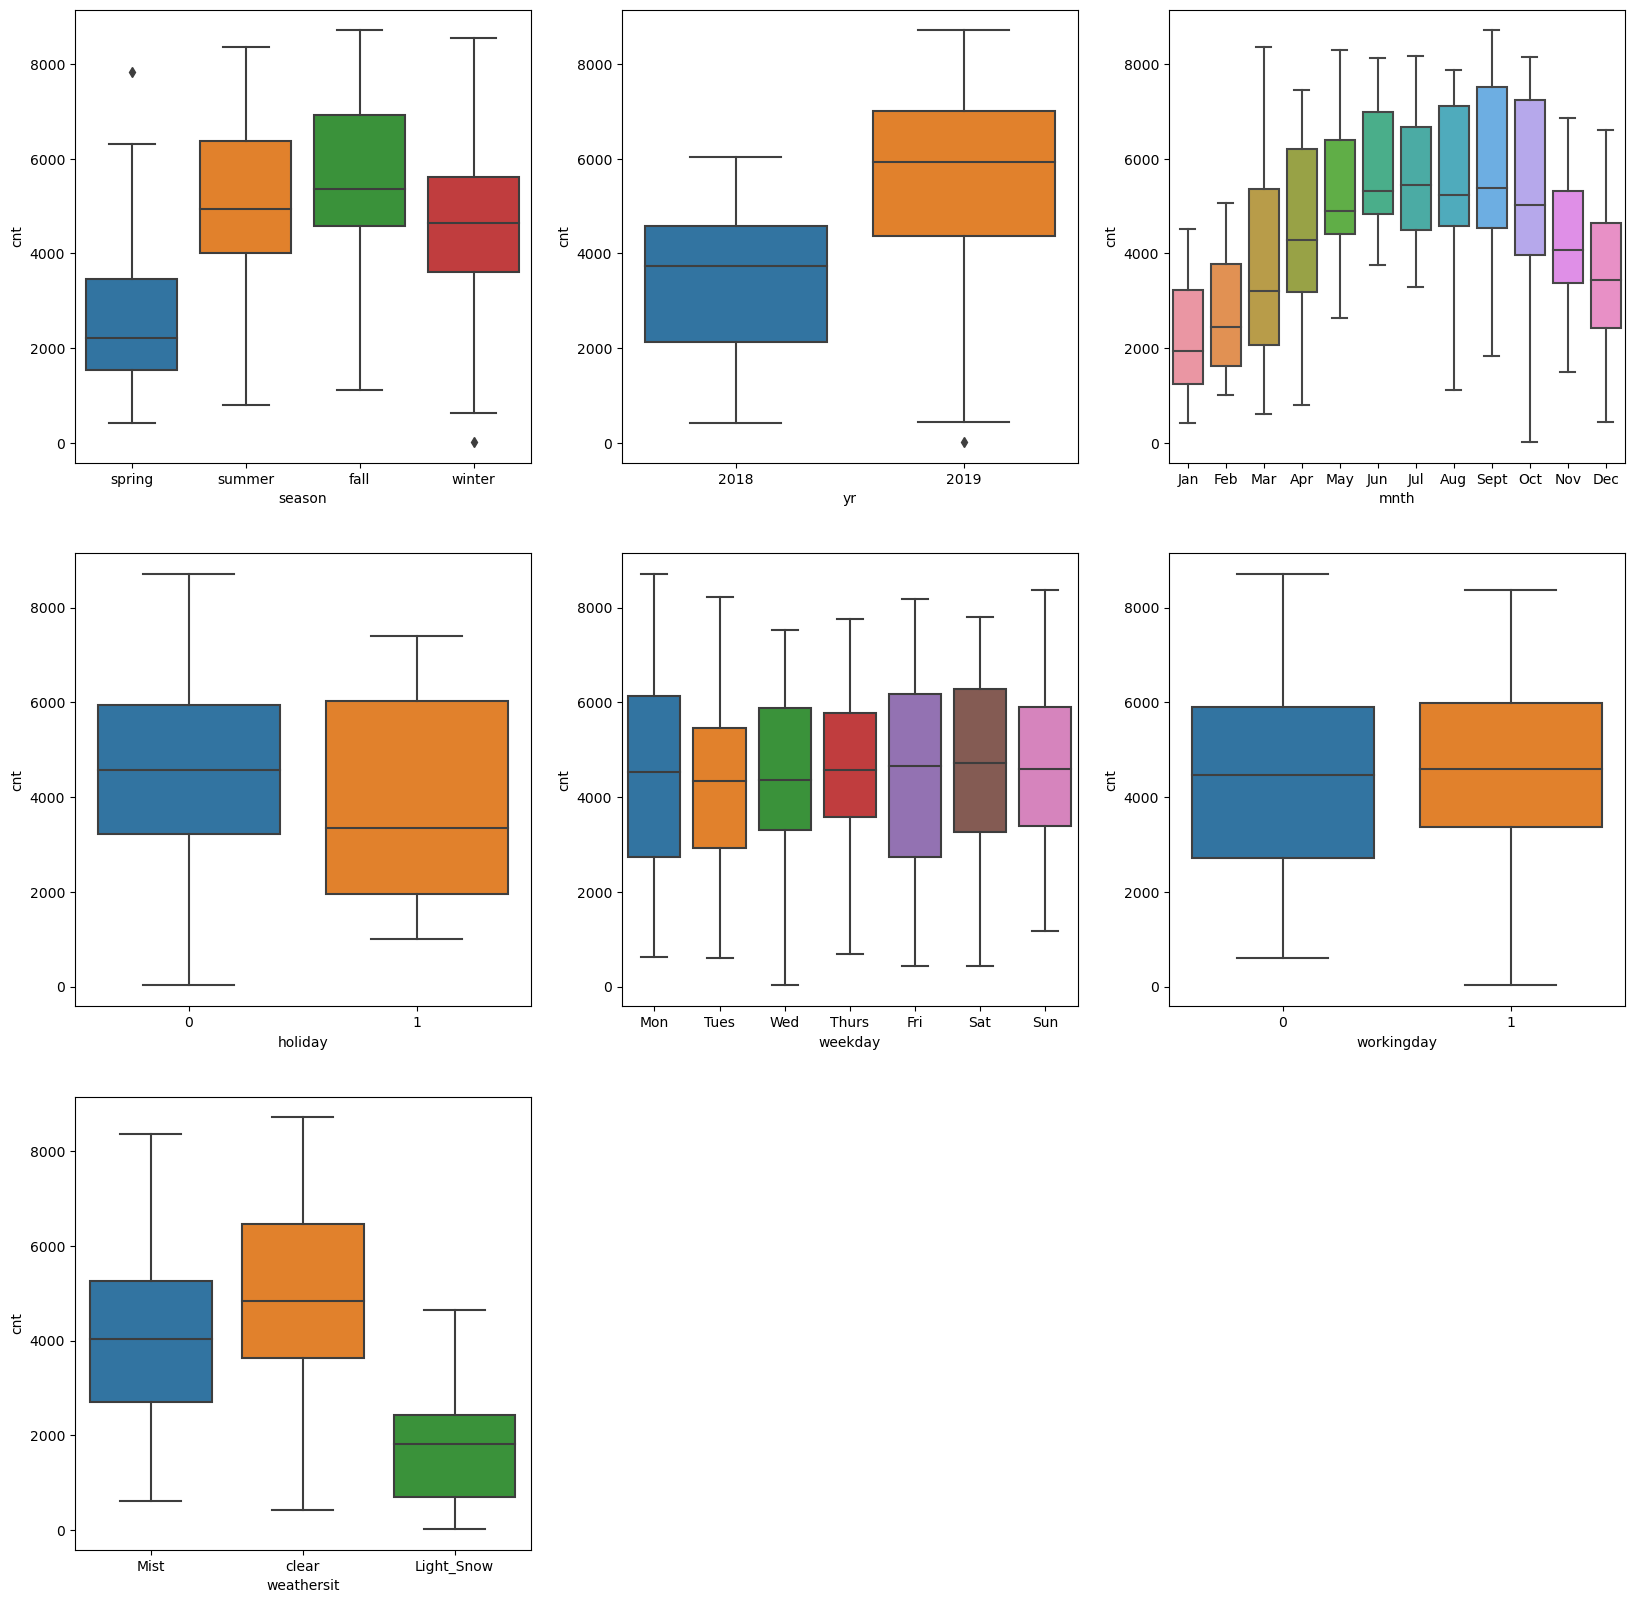

In [168]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_data)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_data)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_data)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_data)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_data)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_data)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_data)
plt.show()

#### Findings from above plot:
- 3: Fall have the highest booking, and spring have the lowest booking. Summer, Fall and Winder are almost closer. That means in Spring bookings are least
- There is noticable increase in bookings from 2018 to 2019
- Booking increase slowly from Jan to July and then  starts decreasing (it might be related to seasons)
- There is slight decrease in bookings on holidays
- Weekday mostly not affecting bookings
- Same with Working dat, it does not have much effect
- Weather situation heavily impact the bookings, if weather is clear bookings are more and based on weather conditions it decreases
- 

In [169]:
bikes_data = bikes_data.drop(columns=['instant'], axis=1)

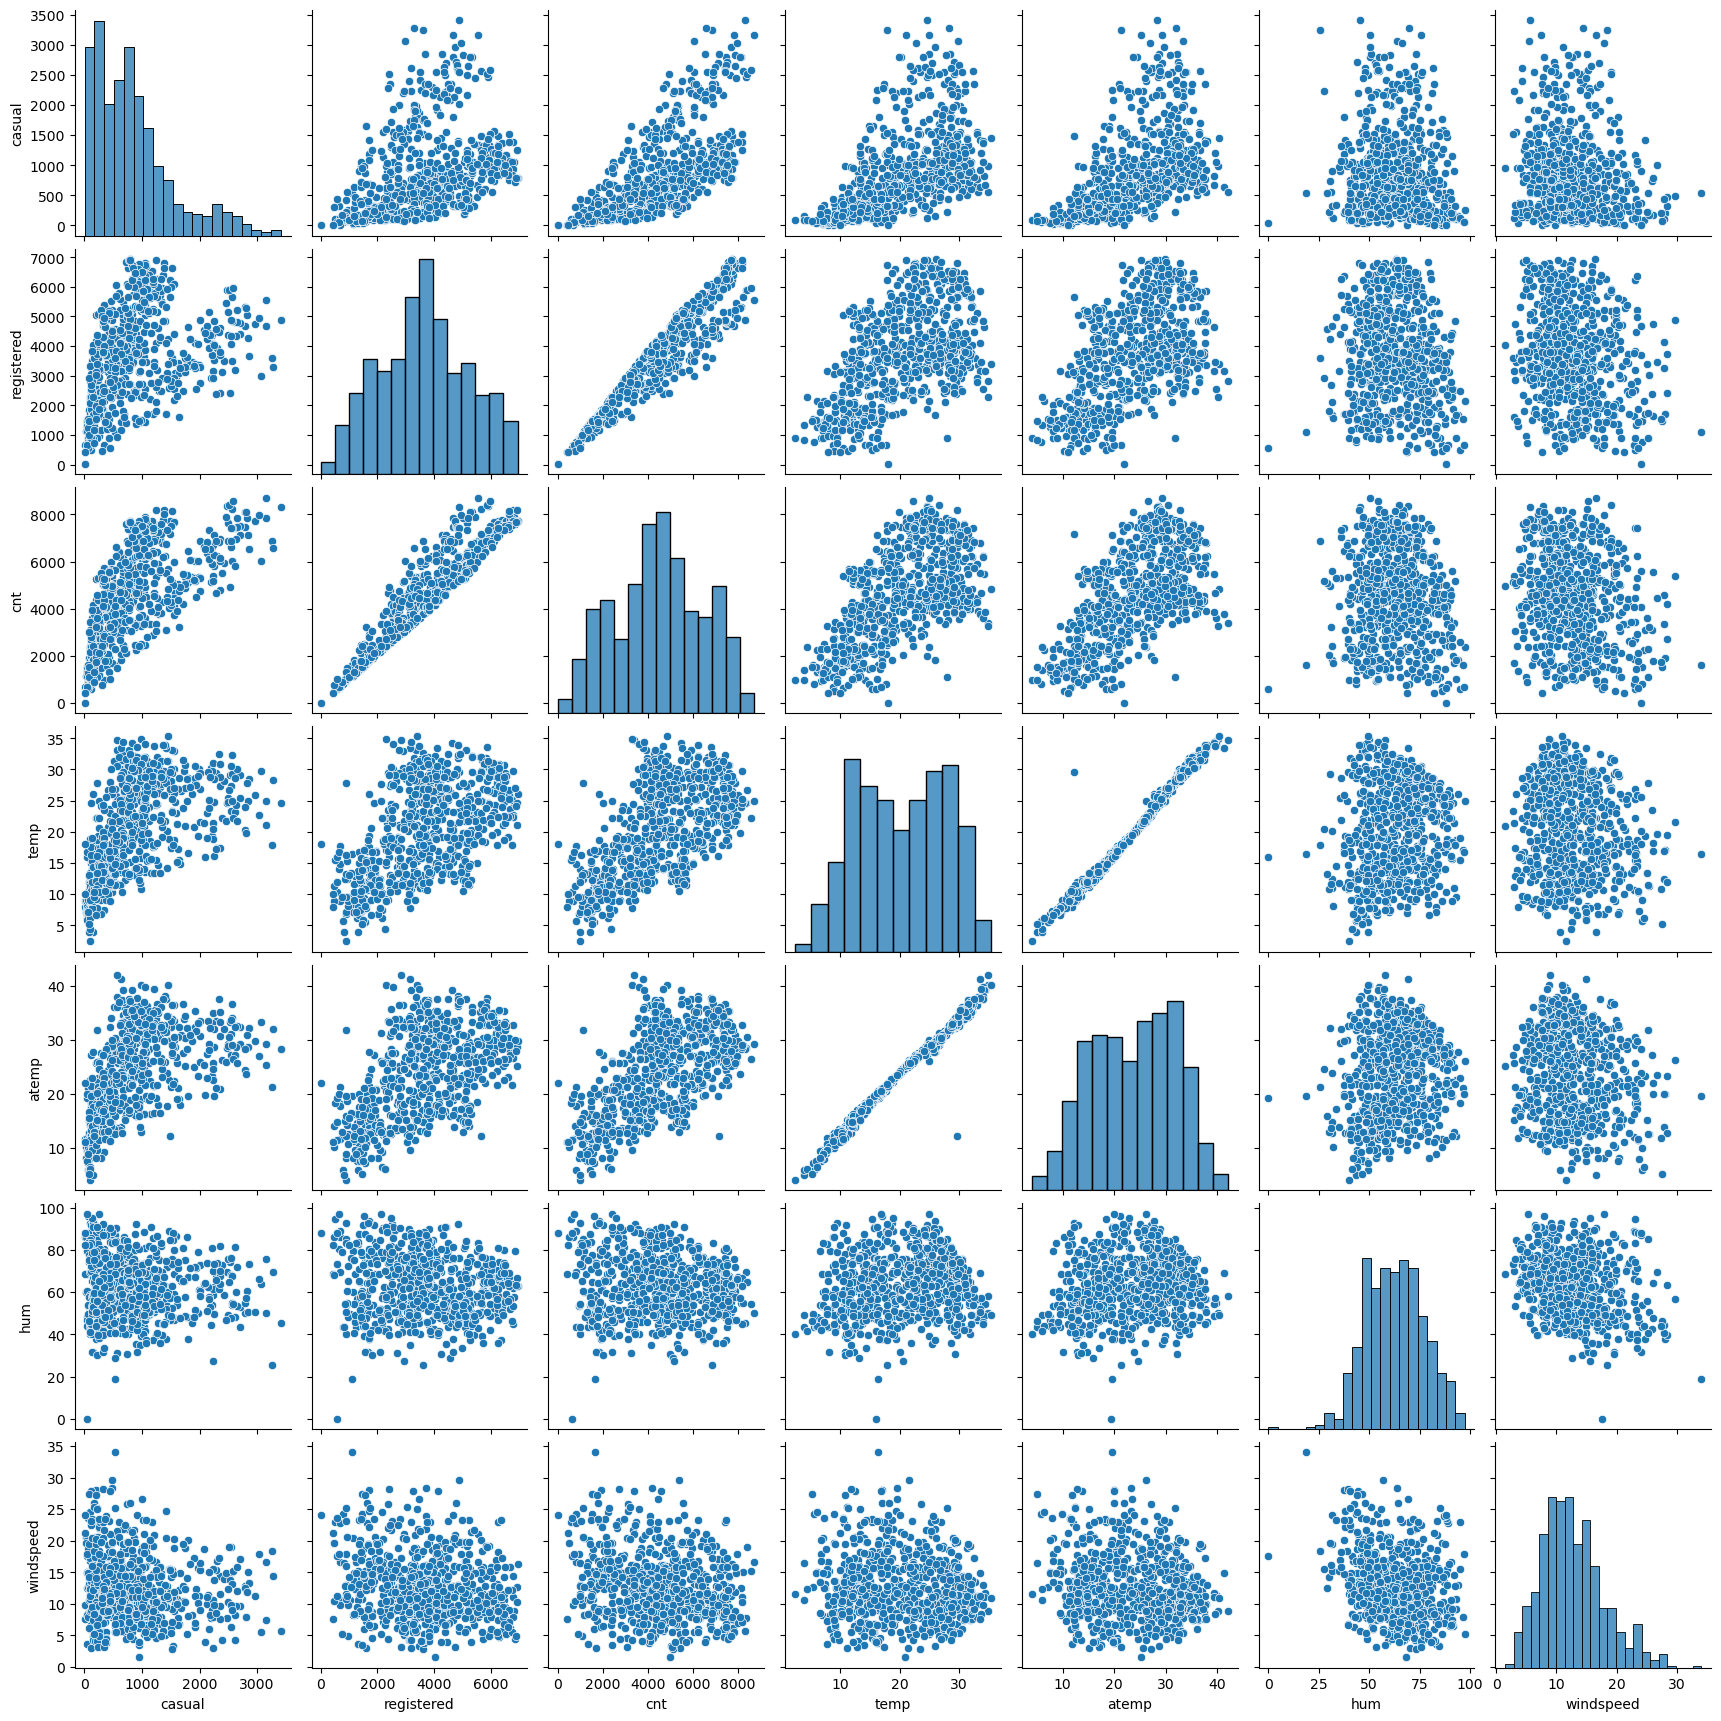

In [121]:
# Pairwise scatter plot
sns.pairplot(bikes_data[['casual', 'registered', 'cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

##### There is a clear relationship between total bookings cnt and temprature temp and atemp also there is a high correlation between temp and atemp

In [26]:
# Correlation matrix
cor = bikes_data.corr()
cor

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

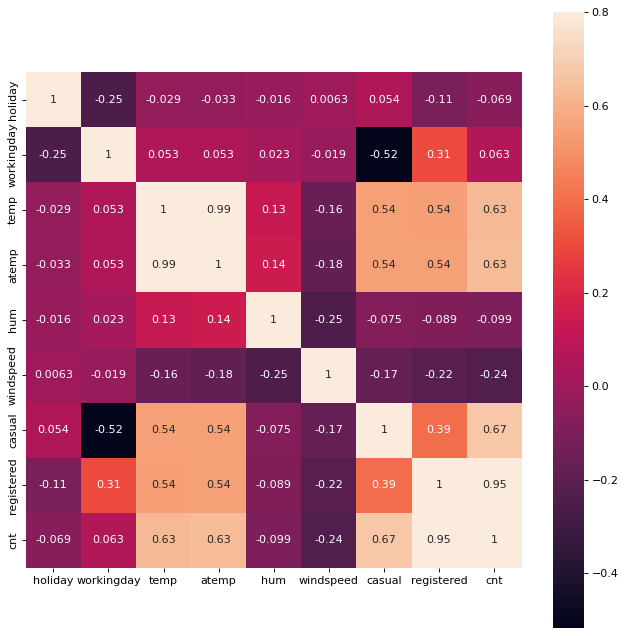

In [27]:
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(cor, vmax=.8, square=True,annot=True)

#### Findings from Correlation matrix:
- Relationship with target variable cnt
    - cnt is highly corrlated with casual and registered, which is obvious as it is sum of these 2
    - as shown in pair plot high correlation between cnt and temp and atemp
    - cnt is also negatively affected by windspeed 
    
- Relationship between feature variables:
    - temp and atemp are highly correlated so once can be ignored
    - wind speed and hum is negatively correlated but correaltion is not that stron that we can drop one

#### Data Preparation

In [170]:
## drop unnecessary columns, date is not required. atemp is represented by temp, casual and registerd together represent cnt
bikes_data = bikes_data.drop(columns=['atemp','casual', 'registered', 'dteday'])

In [171]:

bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


In [172]:
# Subset all categorical variables
bikes_data_categorical=bikes_data.select_dtypes(include=['object'])

In [173]:
bikes_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   yr          730 non-null    object
 2   mnth        730 non-null    object
 3   weekday     730 non-null    object
 4   weathersit  730 non-null    object
dtypes: object(5)
memory usage: 28.6+ KB


###### Convert categorical columns to one hot encoding for modeling

In [174]:
# Convert into dummies
bikes_data_dummies = pd.get_dummies(bikes_data_categorical, drop_first=True)
bikes_data_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_clear
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [175]:
# Drop categorical variable columns
bikes_data = bikes_data.drop(columns = bikes_data_categorical.columns, axis=1)

In [176]:
# Concatenate dummy variables with the original dataframe
bikes_data = pd.concat([bikes_data, bikes_data_dummies], axis=1)

In [177]:
bikes_data.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Mist,weathersit_clear
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Model training

In [179]:
# Split the dataframe into train and test sets

np.random.seed(0)
df_train, df_test = train_test_split(bikes_data,test_size=0.20, random_state=50)

In [180]:
print(df_train.shape)
print(df_test.shape)

(584, 29)
(146, 29)


##### Scaling
As our objective is to find effect of features on target variable cnt. Lets do Scaling to get correct statistical values from model

In [181]:
 scaler = MinMaxScaler()
# Apply scaler() to all the columns except the categorical dummy columns
var = ['temp', 'hum', 'windspeed','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

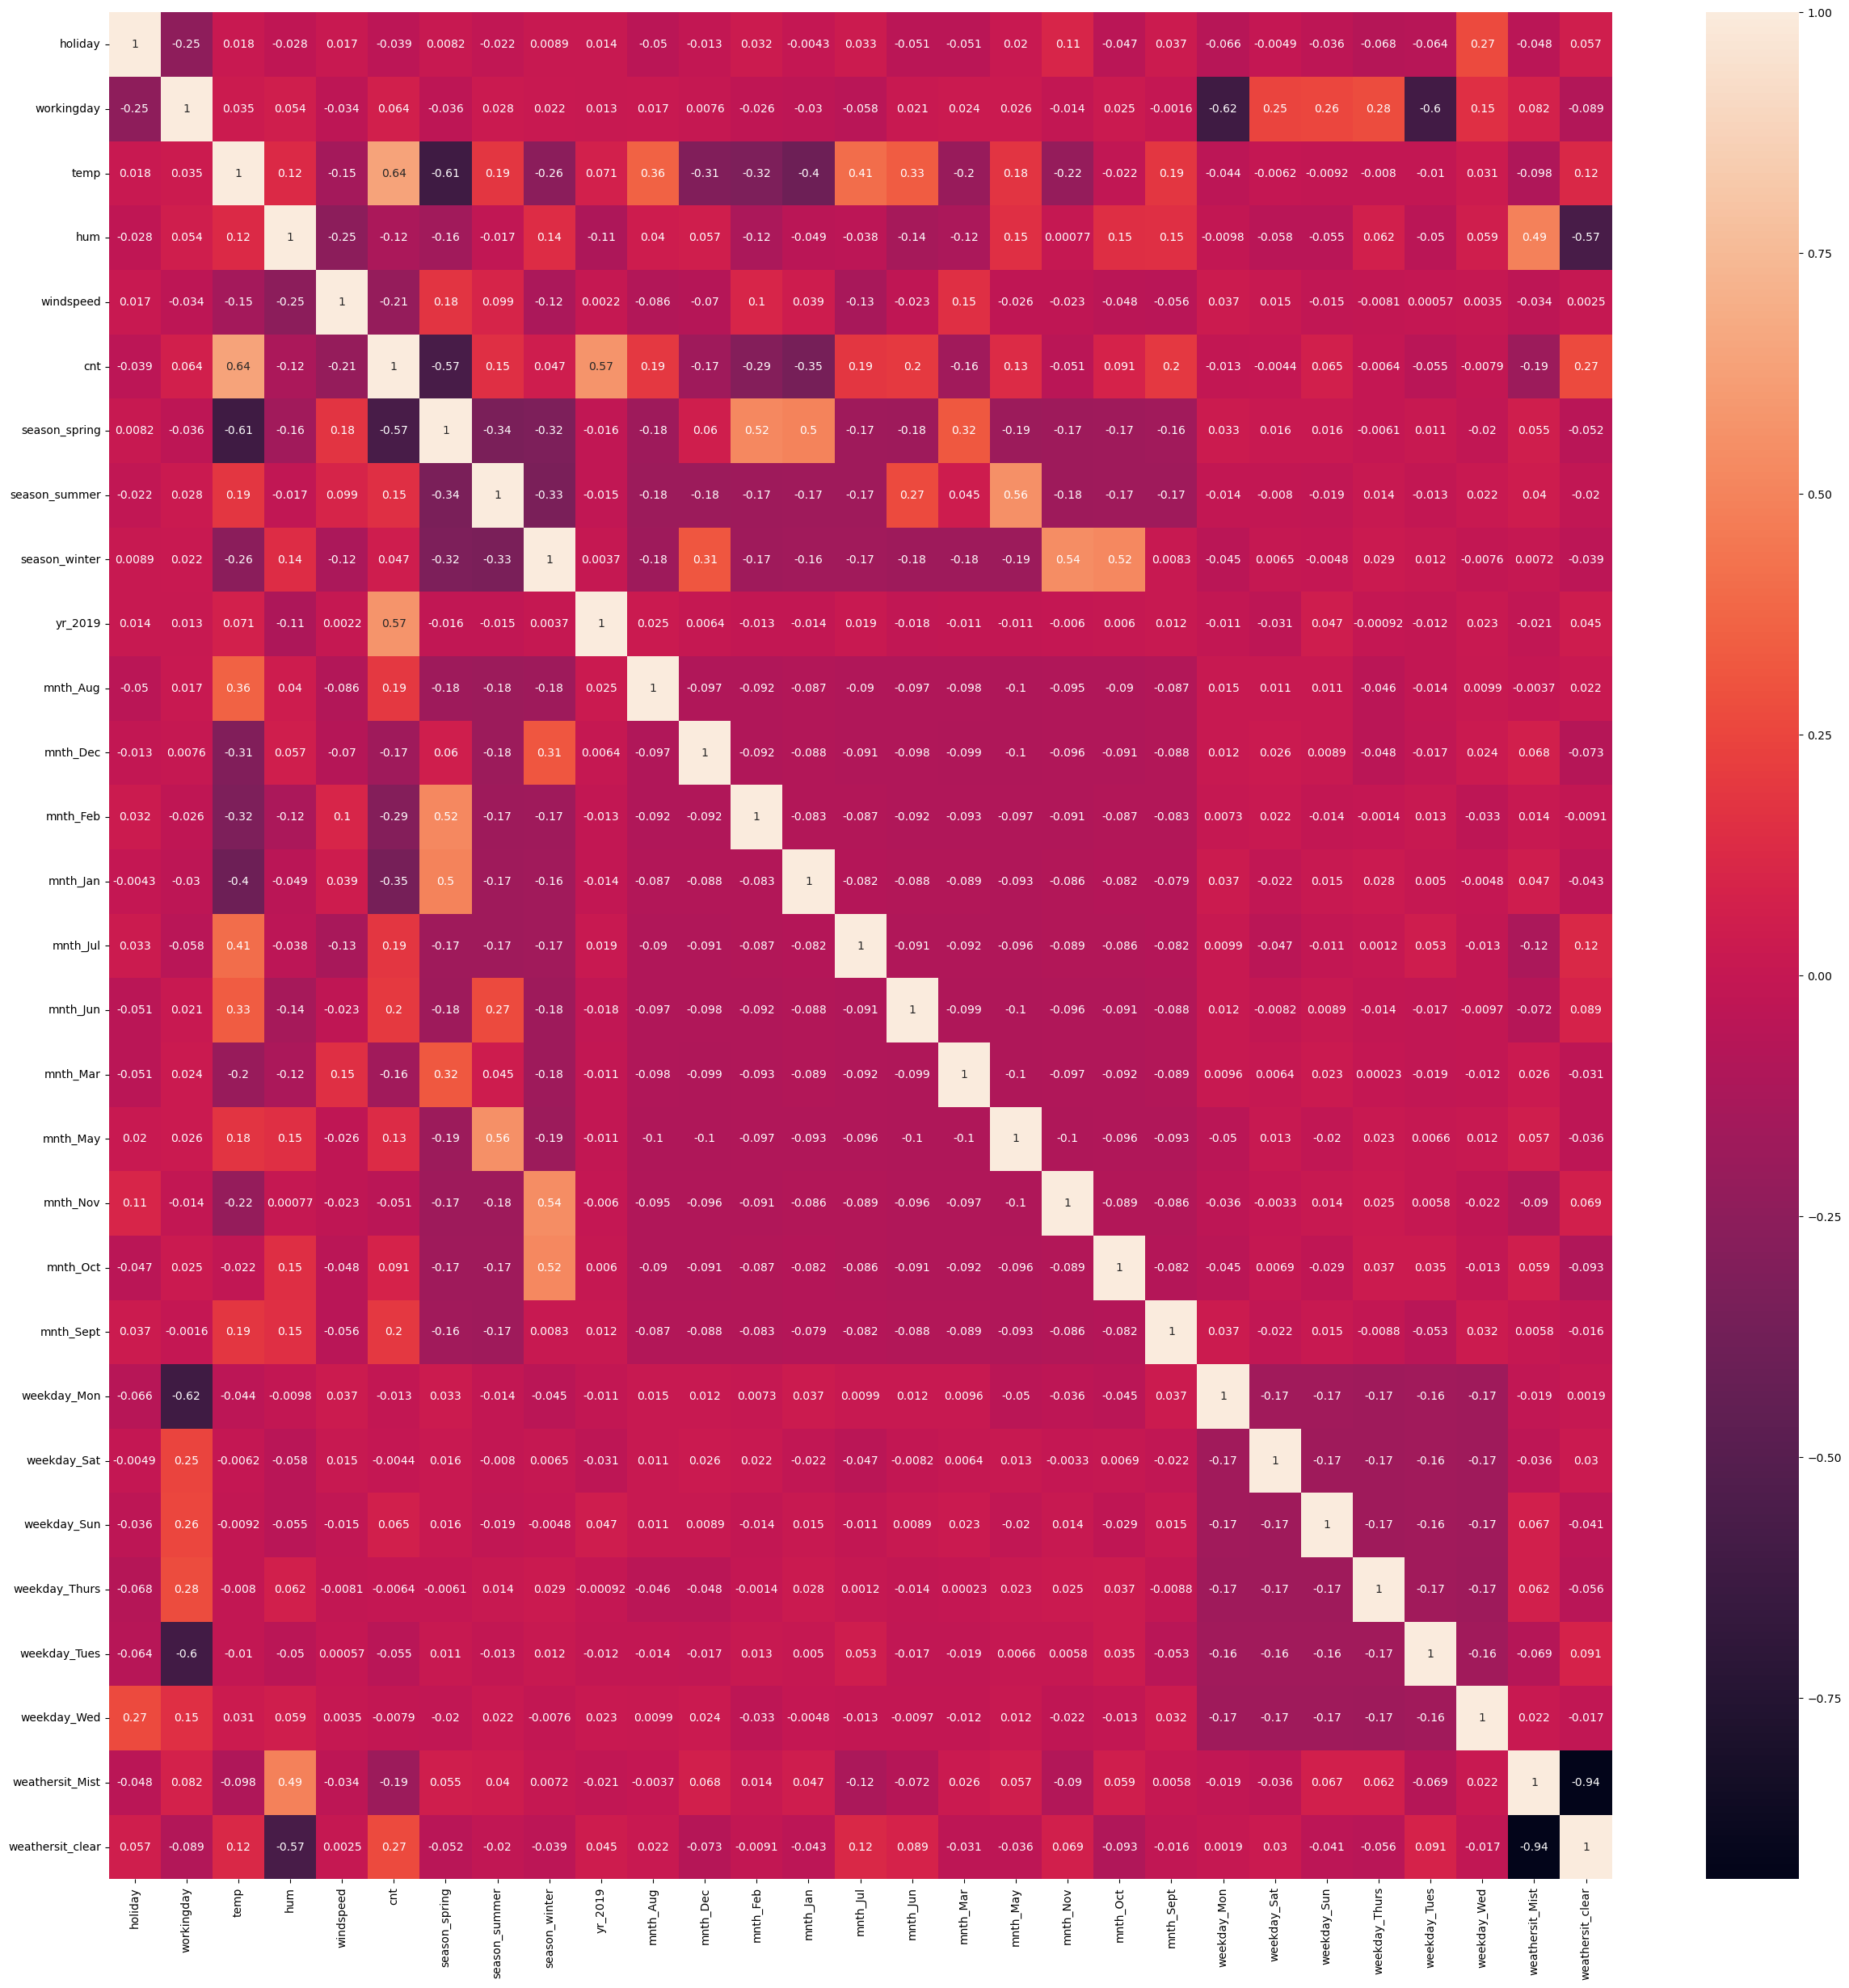

In [182]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

##### Initial model with all features

In [183]:
X_train = df_train.drop(columns=['cnt'], axis=1)
y_train =  df_train['cnt']

In [184]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               0.108112
holiday            -0.022428
workingday          0.053473
temp                0.428228
hum                -0.198060
windspeed          -0.165909
season_spring      -0.081305
season_summer       0.013012
season_winter       0.114572
yr_2019             0.229988
mnth_Aug            0.000566
mnth_Dec           -0.078571
mnth_Feb           -0.034793
mnth_Jan           -0.060935
mnth_Jul           -0.026881
mnth_Jun            0.007017
mnth_Mar            0.001312
mnth_May            0.033283
mnth_Nov           -0.083492
mnth_Oct           -0.015731
mnth_Sept           0.067025
weekday_Mon         0.066561
weekday_Sat         0.000487
weekday_Sun         0.014174
weekday_Thurs      -0.006464
weekday_Tues        0.010505
weekday_Wed        -0.014706
weathersit_Mist     0.174799
weathersit_clear    0.222099
dtype: float64

In [185]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.17e-213
Time:                        13:18:46   Log-Likelihood:                 608.16
No. Observations:                 584   AIC:                            -1160.
Df Residuals:                     556   BIC:                            -1038.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1081      0.041      2.647      0.008       0.028       0.188
holiday             -0.0224      0.023     -0.972      0.332      -0.068       0.023
workingday           0.0535      0.013      4.219      0.000       0.029       0.078
temp                 0.4282      0.043      9.874      0.000       0.343       0.513
hum                 -0.1981      0.036     -5.472      0.000      -0.269      -0.127
windspeed           -0.1659      0.024     -6.959      0.000      -0.213      -0.119
season_spring       -0.0813      0.027     -2.999      0.003      -0.135      -0.028
season_summer        0.0130      0.023      0.577      0.564      -0.031       0.057
season_winter        0.1146      0.025      4.520      0.000       0.065       0.164
yr_2019              0.2300      0.007     30.937      0.000       0.215       0.245
mnth_Aug             0.0006      0.030      0.019      0.985      -0.059       0.060
mnth_Dec            -0.0786      0.031     -2.513      0.012      -0.140      -0.017
mnth_Feb            -0.0348      0.031     -1.137      0.256      -0.095       0.025
mnth_Jan            -0.0609      0.032     -1.906      0.057      -0.124       0.002
mnth_Jul            -0.0269      0.031     -0.857      0.392      -0.089       0.035
mnth_Jun             0.0070      0.023      0.312      0.755      -0.037       0.051
mnth_Mar             0.0013      0.024      0.054      0.957      -0.046       0.049
mnth_May             0.0333      0.019      1.763      0.078      -0.004       0.070
mnth_Nov            -0.0835      0.034     -2.475      0.014      -0.150      -0.017
mnth_Oct            -0.0157      0.033     -0.476      0.634      -0.081       0.049
mnth_Sept            0.0670      0.029      2.331      0.020       0.011       0.123
weekday_Mon          0.0666      0.014      4.754      0.000       0.039       0.094
weekday_Sat          0.0005      0.014      0.036      0.972      -0.026       0.027
weekday_Sun          0.0142      0.014      1.032      0.303      -0.013       0.041
weekday_Thurs       -0.0065      0.014     -0.478      0.633      -0.033       0.020
weekday_Tues         0.0105      0.014      0.727      0.468      -0.018       0.039
weekday_Wed         -0.0147      0.014     -1.058      0.291      -0.042       0.013
weathersit_Mist      0.1748      0.023      7.517      0.000       0.129       0.220
weathersit_clear     0.2221      0.025      8.985      0.000       0.174       0.271
==============================================================================
Omnibus:                      111.286   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.627
Skew:                          -0.886   Prob(JB):                     2.20e-78
Kurtosis:                       6.400   Cond. N

In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,138.25
20,weekday_Mon,27.67
24,weekday_Tues,26.94
27,weathersit_clear,10.83
5,season_spring,10.36
26,weathersit_Mist,9.24
7,season_winter,9.01
6,season_summer,7.44
2,temp,7.32
17,mnth_Nov,6.79


#### Build model using RFE to select columns

In [187]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 18),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', False, 8),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 19),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 15),
 ('weekday_Tues', False, 13),
 ('weekday_Wed', False, 14),
 ('weathersit_Mist', True, 1),
 ('weathersit_clear', True, 1)]

In [189]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Sept', 'weathersit_Mist', 'weathersit_clear'],
      dtype='object')

In [190]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

#### Building model with RFE selected features

In [191]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [192]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)


In [193]:
lm = sm.OLS(y_train,X_train_rfe_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.07e-217
Time:                        13:21:08   Log-Likelihood:                 571.67
No. Observations:                 584   AIC:                            -1121.
Df Residuals:                     573   BIC:                            -1073.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1506      0.044  

#### All RFE selected columns looks good

Lets check VIF

In [194]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
#X = X_train_rfe_lm.drop(columns=['const'], axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,20.08
1,temp,17.08
9,weathersit_clear,12.44
8,weathersit_Mist,8.02
3,windspeed,4.24
4,season_spring,3.16
5,season_winter,2.30
6,yr_2019,2.00
7,mnth_Sept,1.14
0,holiday,1.03


##### We can see hum, temp, weathersit_clear and weathersit_Mist have vif value more than 5 lets drop hum and retrain

In [195]:
# hum have very high VIF value and anything above 5 is considered bad VIF so dropping 
X_train_rfe = X_train_rfe.drop(columns=['hum'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     305.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.82e-212
Time:                        13:21:37   Log-Likelihood:                 555.96
No. Observations:                 584   AIC:                            -1092.
Df Residuals:                     574   BIC:                            -1048.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0193      0.032  

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,weathersit_clear,11.87
1,temp,11.43
7,weathersit_Mist,6.43
2,windspeed,4.23
3,season_spring,2.63
5,yr_2019,1.99
4,season_winter,1.76
6,mnth_Sept,1.13
0,holiday,1.03


In [197]:
# weathersit_clear have very high VIF value and anything above 5 is considered bad VIF so dropping 
X_train_rfe = X_train_rfe.drop(columns=['weathersit_clear'], axis=1)
# Adding a constant variable 
X_train_rfe_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.42e-187
Time:                        13:23:03   Log-Likelihood:                 494.15
No. Observations:                 584   AIC:                            -970.3
Df Residuals:                     575   BIC:                            -931.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2440      0.026     

In [198]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.96
1,temp,3.76
5,yr_2019,1.97
3,season_spring,1.68
7,weathersit_Mist,1.47
4,season_winter,1.32
6,mnth_Sept,1.13
0,holiday,1.03


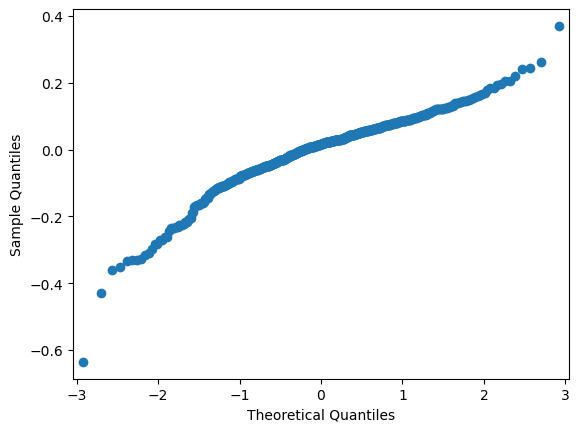

In [215]:
res = lm.resid

fig = sm.qqplot(res)
plt.show()

Model seems to be doing good, in respect to p value and VIF. and with good R square and Adjusted R square. 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [200]:
y_train_pred = lm.predict(X_train_rfe_lm)
# r2_score value
r2_score(y_train, y_train_pred)

0.7864374318191029

In [201]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

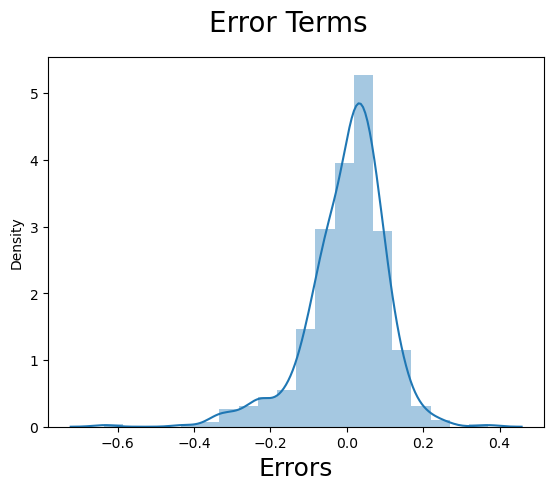

In [202]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Text(0, 0.5, 'y_pred')

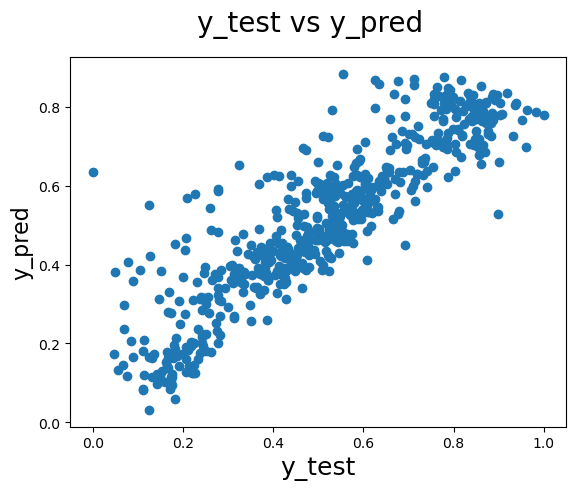

In [203]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Model Evaluation using test data

In [204]:
X_train_rfe.columns

Index(['holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Sept', 'weathersit_Mist'],
      dtype='object')

In [207]:

var_test = ['temp', 'hum', 'windspeed','cnt']

## We scaled data while training so need to scale test data as well
df_test[var_test] = scaler.transform(df_test[var_test])
X_test_rfe = df_test[X_train_rfe.columns]
X_test_rfe_lm = sm.add_constant(X_test_rfe)
y_test =df_test['cnt']
y_test_pred = lm.predict(X_test_rfe_lm)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

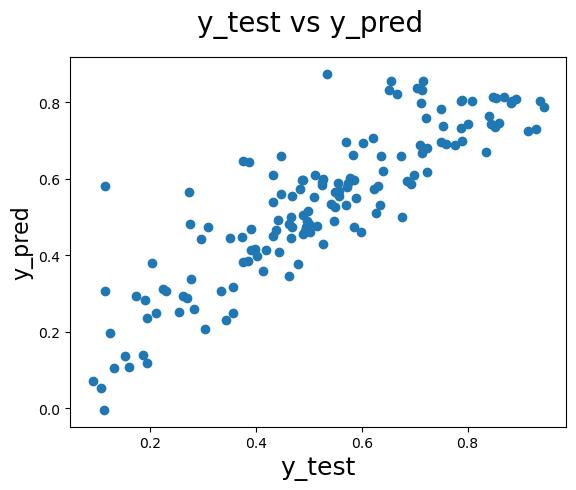

In [208]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [209]:
r2_score(y_test, y_test_pred)

0.7530784121639071

In [212]:
lm.params

const              0.244012
holiday           -0.084523
temp               0.433354
windspeed         -0.135404
season_spring     -0.123336
season_winter      0.036464
yr_2019            0.241186
mnth_Sept          0.058033
weathersit_Mist   -0.060089
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 0.244012 + (-0.084523) * holiday + 0.084523 * temp + (-0.084523) * windspeed + (-0.123336) * season_spring + 0.036464 * season_winter  +  0.241186 * yr_2019 + 0.058033 * mnth_Sept + (-0.060089) * weathersit_Mist 

All the positive coefficients like temp/season_winter/yr_2019/mnth_Sept indicate that an increase in these values will lead to an increase in the value of cnt.

At same time all negative coefficients like holiday/windspeed/season_spring/weathersit_Mist   indicate that an increase in these values will lead to an decrease in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
- Temp is the most significant with the largest coefficient, which we expected from correlation matrix as well.
- Followed by yr_2019 and mnth_Sept.
- Bike rentals is inveresely effected by windspeed and season_spring
- The rentals reduce during holidays
This indicates that the bike rentals is majorly affected by temperature,season and month.